<a href="https://colab.research.google.com/github/zxc741xb/Breast_cancer/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
col_names = ['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']
df = pd.read_csv('/content/drive/MyDrive/dataset/breast-cancer.data', header=None, names=col_names)
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [4]:
df.shape

(286, 10)

In [5]:
df['class'] = df['class'].map({'no-recurrence-events' : 0, 'recurrence-events' : 1}).astype('int')

In [6]:
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [7]:
df[['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']] = df[['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']].apply(lambda x: pd.factorize(x)[0])
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,0,0,0,0,0,3,0,0,0
1,0,1,0,1,0,0,2,1,1,0
2,0,1,0,1,0,0,2,0,0,0
3,0,2,1,2,0,0,2,1,2,0
4,0,1,0,3,0,0,2,1,3,0


In [8]:
df.isnull().any()

class          False
age            False
menopause      False
tumor-size     False
inv-nodes      False
node-caps      False
deg-malig      False
breast         False
breast-quad    False
irradiat       False
dtype: bool

In [12]:
feature_cols = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']
X = df[feature_cols]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Decision tree
clf_param = {"max_depth":[3,4,5,6,7]}
clf =  DecisionTreeClassifier()
GSCV = GridSearchCV(clf,param_grid=clf_param,cv=5)
GSCV.fit(X_train, y_train)
clf =  DecisionTreeClassifier(max_depth=7)
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Decision tree accuracy:",metrics.accuracy_score(y_test, y_pred))
print("The best model param :",GSCV.best_params_)

Decision tree accuracy: 0.7241379310344828
The best model param : {'max_depth': 7}


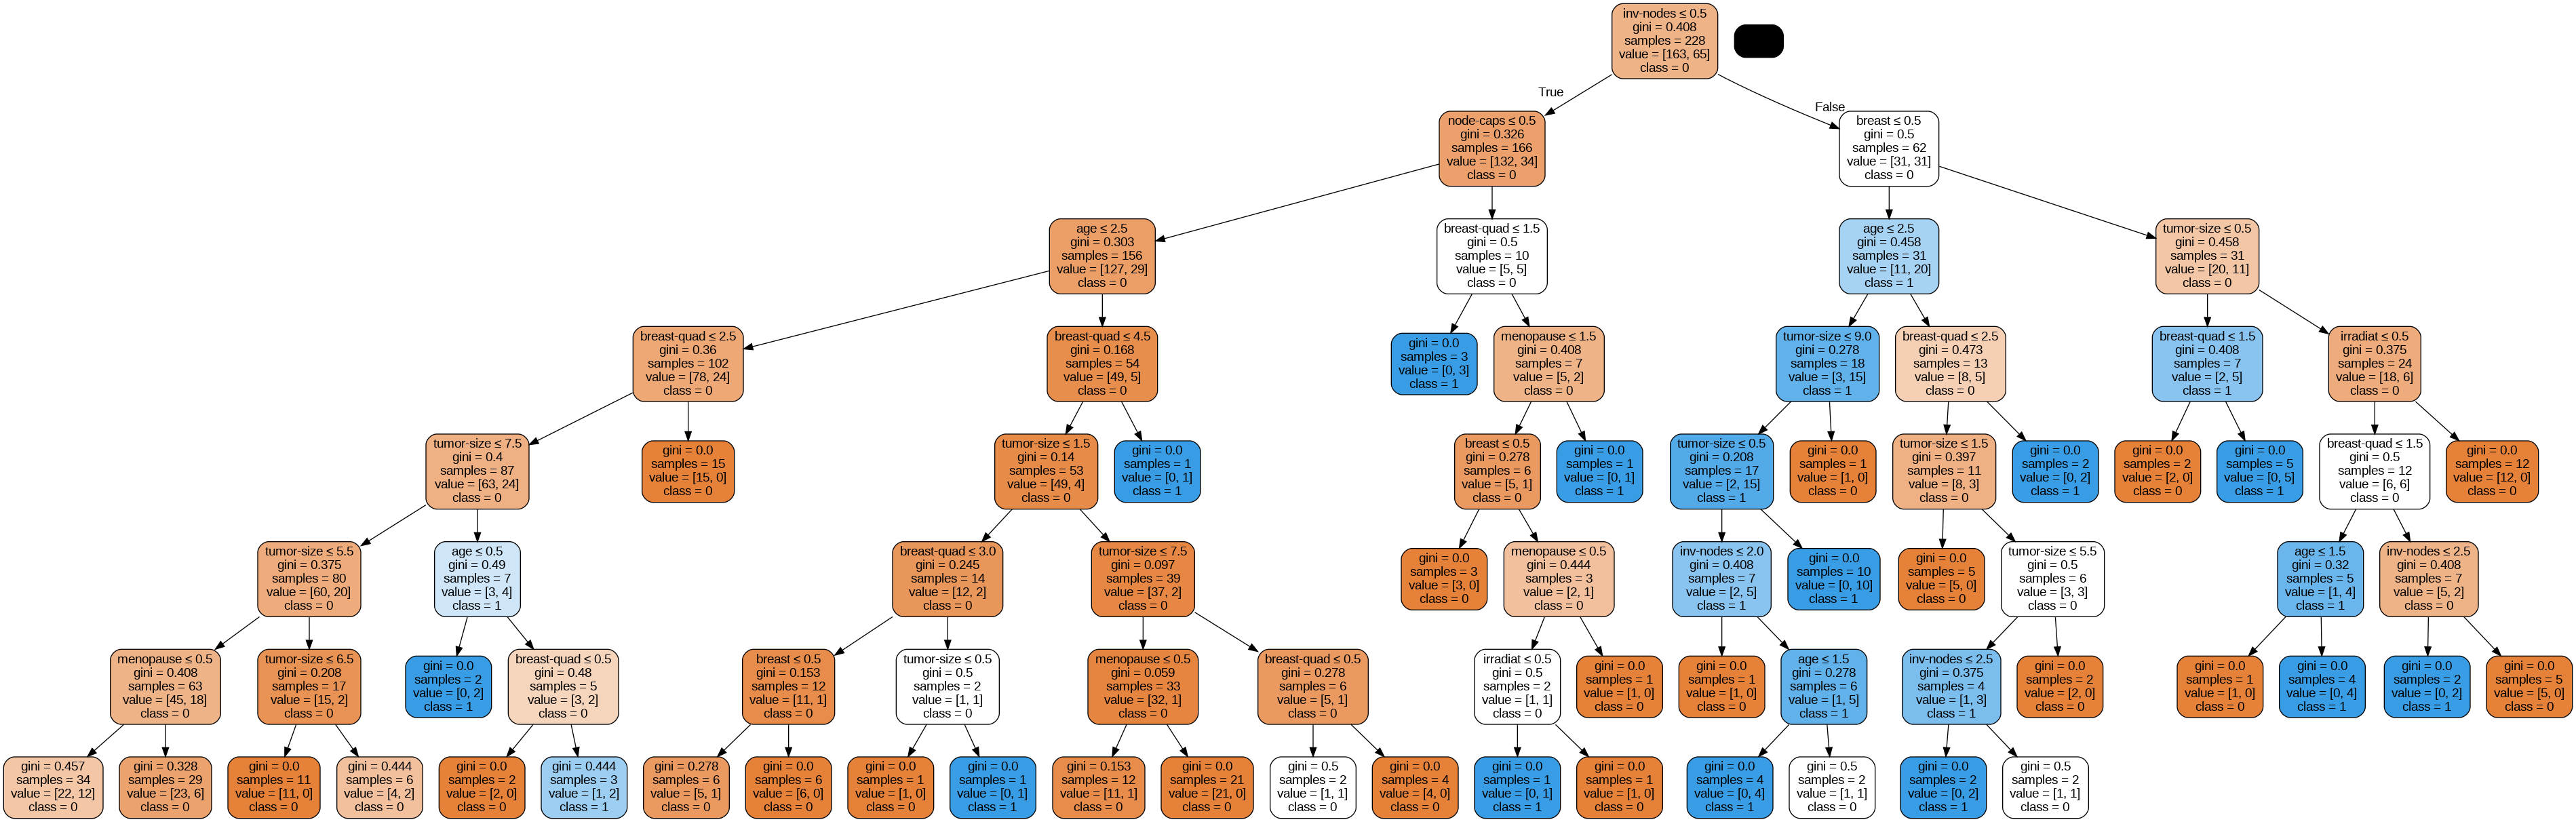

In [10]:
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [11]:
# Random forest
from sklearn import ensemble
RF_param = {"n_estimators":[10,50,100,150,200],"max_depth":[3,4,5,6,7]}
RF = ensemble.RandomForestClassifier(random_state=42)
GSCV = GridSearchCV(RF,param_grid=RF_param,cv=5)
GSCV.fit(X_train, y_train)
RF = ensemble.RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)
RF.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RF.predict(X_test)

print("Random forest accuracy:",metrics.accuracy_score(y_test, y_pred))
print("The best model param :",GSCV.best_params_)

Random forest accuracy: 0.6896551724137931
The best model param : {'max_depth': 7, 'n_estimators': 200}


In [15]:
# XGBoost
import xgboost as xgb
import numpy as np
n_estimators = [10,50,100,150,200]
max_depth = [3,4,5,6,7]
learning_rate=[round(float(x),2) for x in np.linspace(start=0.01, stop=0.2, num=10)]
xgb_model = xgb.XGBClassifier(random_state=42)
param_grid = {'n_estimators': n_estimators,
        'max_depth': max_depth,
        'learning_rate': learning_rate,}
GSCV = GridSearchCV(xgb_model,param_grid=param_grid,cv=5)
GSCV.fit(X_train, y_train)
xgb_model = xgb.XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=10, random_state=42)
xgb_model.fit(X_train, y_train)

# Prediction 
test_y_predicted = xgb_model.predict(X_test)

# Evaluate
print("XGBoost accuracy:",metrics.accuracy_score(y_test, y_pred))
print("The best model param :",GSCV.best_params_)

XGBoost accuracy: 0.7241379310344828
The best model param : {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10}
